# Importation des packages et chargement des données

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt



In [ ]:

# Charger la base de données Breast Cancer
data = load_breast_cancer()
X, y = data.data, data.target
columns = data.feature_names


In [ ]:
X

# Sélection des variables en utilisant une approche par filtrage

## Sélection des variables basée sur la variance

In [ ]:


# Calculer la variance pour chaque caractéristique
variances = np.var(X, axis=0)
sorted_indices = np.argsort(variances)[::-1]

# Afficher la courbe des variances
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=variances[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Variance')
plt.title('Sélection des caractéristiques basée sur la variance')
plt.show()


In [ ]:
from sklearn.feature_selection import VarianceThreshold
# Appliquer le seuil de variance
threshold = 0.8 * (1 - 0.8)  # Exemple de seuil, à adapter selon les besoins
selector = VarianceThreshold(threshold=threshold)
X_high_variance = selector.fit_transform(X)

# Afficher les caractéristiques sélectionnées
selected_columns = columns[selector.get_support()]
print(f"Caractéristiques sélectionnées : {selected_columns}")

## Choix des variables en se basant sur l'ANOVA

In [ ]:
# Charger la base de données breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Appliquer la fonction SelectKBest avec ANOVA pour sélectionner les k meilleures caractéristiques
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)
anova_scores = selector.scores_
sorted_indices = np.argsort(anova_scores)[::-1]

# Afficher la courbe des scores ANOVA
plt.figure(figsize=(15, 5))
plt.bar(x=data.feature_names[sorted_indices], height=anova_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Statistique de test ANOVA')
plt.title('Sélection des caractéristiques avec ANOVA')
plt.show()

In [ ]:

# Sélectionner les meilleures caractéristiques avec SelectKBest et ANOVA
best_features = SelectKBest(score_func=f_classif, k=10)
X_new = best_features.fit_transform(X, y)
selected_features = data.feature_names[best_features.get_support()]

print('Les meilleures caractéristiques sont :', selected_features)

In [ ]:
from scipy.stats import f_oneway,shapiro, levene
# Séparer les données en deux groupes en fonction de la variable cible
group0 = X[y == 0]
group1 = X[y == 1]

# Calculer les scores F pour chaque caractéristique avec l'ANOVA
f_scores = np.array([f_oneway(group0[:, i], group1[:, i])[0] for i in range(X.shape[1])])
sorted_indices = np.argsort(f_scores)[::-1]

# Afficher la courbe des scores F
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=f_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("F-score")
plt.title('Sélection des caractéristiques avec l\'ANOVA')
plt.show()

In [ ]:

# Calculer les p-valeurs pour les tests de normalité (Shapiro-Wilk) et de Levene
normality_p_values = np.array([shapiro(X[:, i])[1] for i in range(X.shape[1])])
levene_p_values = np.array([levene(group0[:, i], group1[:, i])[1] for i in range(X.shape[1])])

# Seuil de significativité
alpha = 0.05

# Vérifier si les tests sont validés (p-valeur >= alpha)
normality_results = normality_p_values >= alpha
levene_results = levene_p_values >= alpha

# Créer un DataFrame pour présenter les résultats
results_df = pd.DataFrame({
    'Caractéristiques': columns,
    'Normalité (p-valeur)': normality_p_values,
    'Normalité (validé)': normality_results,
    'Levene (p-valeur)': levene_p_values,
    'Levene (validé)': levene_results
})

# Afficher le tableau des résultats
print(results_df)

In [ ]:

# Calculer la normalité et l'égalité des variances pour chaque variable
normality_p_values = []
equality_variances_p_values = []
normality = []
equality_variances = []
alpha = 0.05

for i, column in enumerate(data.feature_names):
    w, p_w = shapiro(X[:, i])
    levene_stat, levene_p = levene(X[y == 0][:, i], X[y == 1][:, i], center='mean')
    normality_p_values.append(p_w)
    equality_variances_p_values.append(levene_p)
    normality.append(p_w > alpha)
    equality_variances.append(levene_p > alpha)

# Appliquer la fonction SelectKBest avec ANOVA pour sélectionner les k meilleures caractéristiques
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)
anova_scores = selector.scores_
sorted_indices = np.argsort(anova_scores)[::-1]

# Afficher les résultats sous forme de tableau
table = pd.DataFrame({'Caractéristique': data.feature_names[sorted_indices],
                      'Score ANOVA': anova_scores[sorted_indices],
                      'Normalité (p-valeur)': np.array(normality_p_values)[sorted_indices],
                      'Normalité': np.array(normality)[sorted_indices],
                      'Égalité des variances (p-valeur)': np.array(equality_variances_p_values)[sorted_indices],
                      'Égalité des variances': np.array(equality_variances)[sorted_indices]})
print(table)

## Sélection des variables en se basant sur le test de kruskall wallis

In [ ]:
from scipy.stats import kruskal
# Séparer les données en deux groupes en fonction de la variable cible
group0 = X[y == 0]
group1 = X[y == 1]

# Appliquer la fonction SelectKBest avec Kruskal-Wallis pour sélectionner les k meilleures caractéristiques
selector = SelectKBest(score_func=lambda X, y: np.array([kruskal(group0[:, i], group1[:, i]).statistic for i in range(X.shape[1])]), k='all')
X_new = selector.fit_transform(X, y)
kruskal_scores = selector.scores_
sorted_indices = np.argsort(kruskal_scores)[::-1]

# Afficher la courbe des scores Kruskal-Wallis
plt.figure(figsize=(15, 5))
plt.bar(x=data.feature_names[sorted_indices], height=kruskal_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Statistique de test Kruskal-Wallis')
plt.title('Sélection des caractéristiques avec Kruskal-Wallis')
plt.show()

In [ ]:
# Sélectionner les meilleures caractéristiques avec SelectKBest et Kruskal-Wallis
best_features = SelectKBest(score_func=lambda X, y: np.apply_along_axis(lambda x: kruskal(x, y).statistic, 0, X), k=10)
X_new = best_features.fit_transform(X, y)
selected_features = data.feature_names[best_features.get_support()]

print('Les meilleures caractéristiques sont :', selected_features)

In [ ]:
from scipy.stats import kruskal
# Séparer les données en deux groupes en fonction de la variable cible
group0 = X[y == 0]
group1 = X[y == 1]

# Calculer les scores H pour chaque caractéristique avec le test de Kruskal-Wallis
h_scores = np.array([kruskal(group0[:, i], group1[:, i])[0] for i in range(X.shape[1])])
sorted_indices = np.argsort(h_scores)[::-1]

# Afficher la courbe des scores H
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=h_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("H-score")
plt.title('Sélection des caractéristiques avec le test de Kruskal-Wallis')
plt.show()

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X, y = data.data, data.target
columns = data.feature_names

# Sélectionner les meilleures caractéristiques avec SelectKBest et Kruskal-Wallis
best_features = SelectKBest(score_func=lambda X, y: np.apply_along_axis(lambda x: kruskal(x, y).statistic, 0, X), k=10)
X_new = best_features.fit_transform(X, y)
selected_features = columns[best_features.get_support()]

# Diviser le jeu de données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

# Entraîner une régression logistique sur les caractéristiques sélectionnées
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print('Précision : {:.2f}'.format(accuracy))

## Sélection des variables en se basant sur le khi deux

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
# Charger les données
data = load_breast_cancer(as_frame=True).frame

# Discrétiser les variables numériques
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
num_cols = data.select_dtypes(include='number').columns
data[num_cols] = discretizer.fit_transform(data[num_cols])

# Transformer les colonnes en caractères
data[num_cols] = data[num_cols].astype(str)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import chi2_contingency
# Charger la base de données Breast Cancer
data = load_breast_cancer()
X, y = data.data, data.target
columns = data.feature_names

# Discrétiser les colonnes
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(X)

# Calculer les scores de Khi deux pour chaque caractéristique
chi2_scores = np.array([chi2_contingency(pd.crosstab(X_discrete[:, i], y))[0] for i in range(X_discrete.shape[1])])
sorted_indices = np.argsort(chi2_scores)[::-1]

# Afficher la courbe des scores de Khi deux
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=chi2_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("Khi deux")
plt.title('Sélection des caractéristiques avec le test de Khi deux')
plt.show()






## Sélection basée sur le Cramer

In [ ]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))



In [ ]:
# Charger la base de données Breast Cancer
data = load_breast_cancer()
X, y = data.data, data.target
columns = data.feature_names

# Discrétiser les colonnes
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(X)

# Calculer les scores de V de Cramér pour chaque caractéristique
cramers_v_scores = np.array([cramers_v(X_discrete[:, i], y) for i in range(X_discrete.shape[1])])
sorted_indices = np.argsort(cramers_v_scores)[::-1]

# Afficher la courbe des scores V de Cramér
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=cramers_v_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("V de Cramér")
plt.title('Sélection des caractéristiques avec le V de Cramér')
plt.show()

## Sélection basée sur le T de Tschuprow

In [ ]:
def tchuprow_t(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / (np.sqrt((k - 1) * (r - 1))))


In [ ]:

# Charger la base de données Breast Cancer
data = load_breast_cancer()
X, y = data.data, data.target
columns = data.feature_names

# Discrétiser les colonnes
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(X)

# Calculer les scores de T de Tchuprow pour chaque caractéristique
tchuprow_t_scores = np.array([tchuprow_t(X_discrete[:, i], y) for i in range(X_discrete.shape[1])])
sorted_indices = np.argsort(tchuprow_t_scores)[::-1]

# Afficher la courbe des scores T de Tchuprow
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=tchuprow_t_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("T de Tchuprow")
plt.title('Sélection des caractéristiques avec le T de Tchuprow')
plt.show()

## Sélection basée sur l'information value

L'Information Value (IV) est une mesure utilisée pour évaluer la puissance prédictive d'une variable catégorielle dans un modèle de régression binaire. L'IV est basé sur le concept de Weight of Evidence (WOE), qui est une mesure logarithmique des proportions d'événements et de non-événements pour chaque catégorie d'une variable.

### Calcul de l'Information Value

L'Information Value pour une variable est calculée en utilisant la formule suivante :

$$IV = \sum_{i=1}^n (EventDist_i - NonEventDist_i) * WOE_i$$

où $n$ est le nombre de catégories pour la variable, $EventDist_i$ est la proportion d'événements pour la catégorie $i$, $NonEventDist_i$ est la proportion de non-événements pour la catégorie $i$, et $WOE_i$ est le Weight of Evidence pour la catégorie $i$.

Le Weight of Evidence pour une catégorie est calculé en utilisant la formule suivante :

$$WOE_i = \ln \frac{EventDist_i}{NonEventDist_i}$$

### Interprétation de l'Information Value

L'Information Value peut être interprété comme suit :

- IV < 0.02 : La variable a très peu de pouvoir prédictif.
- 0.02 <= IV < 0.1 : La variable a un faible pouvoir prédictif.
- 0.1 <= IV < 0.3 : La variable a un pouvoir prédictif moyen.
- 0.3 <= IV < 0.5 : La variable a un pouvoir prédictif fort.
- IV >= 0.5 : La variable a un pouvoir prédictif très fort, mais cela peut indiquer une fuite d'informations (data leakage) ou un problème avec les données.


In [ ]:
# Calculate information value
def calc_iv(df, feature, target, pr=0, epsilon=1e-6):

    lst = []

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log((data['Distribution Good'] + epsilon) / (data['Distribution Bad'] + epsilon))
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    if pr == 1:
        print(data)

    return data['IV'].values[0]

In [ ]:

# Créer un DataFrame avec les caractéristiques et la variable cible
df = pd.DataFrame(X, columns=columns)
df['target'] = y

# Discrétiser les colonnes
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
X_discrete = discretizer.fit_transform(df[columns])

# Mettre à jour le DataFrame avec les colonnes discrétisées
df[columns] = X_discrete

# Calculer l'Information Value pour chaque caractéristique
iv_scores = np.array([calc_iv(df, column, 'target') for column in columns])
sorted_indices = np.argsort(iv_scores)[::-1]

# Afficher la courbe des scores d'Information Value
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=iv_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("Information Value")
plt.title('Sélection des caractéristiques avec Information Value')
plt.show()


In [ ]:
# Autre approche sans discretisation
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [ ]:
def iv_woe(data, target, bins=10, show_woe=False, epsilon=1e-6):
    
    #Empty Dataframe
    newDF, woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars])) > 10):
            binned_x = pd.qcut(data[ivars], bins, duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']

        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], epsilon) / (d['Events'].sum() + epsilon)

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], epsilon) / (d['Non-Events'].sum() + epsilon)

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events'] / d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(), 6)))
        temp = pd.DataFrame({"Variable": [ivars], "IV": [d['IV'].sum()]}, columns=["Variable", "IV"])
        newDF = pd.concat([newDF, temp], axis=0)
        woeDF = pd.concat([woeDF, d], axis=0)

        # Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [ ]:

# Créer un DataFrame à partir des données
df = pd.DataFrame(X, columns=columns)
df['target'] = y

# Calculer l'Information Value pour chaque caractéristique
iv_df, woe_df = iv_woe(df, 'target', bins=4)

# Trier les caractéristiques en fonction de l'Information Value
iv_df = iv_df.sort_values(by='IV', ascending=False)

# Afficher la courbe des scores d'Information Value
plt.figure(figsize=(15, 5))
plt.bar(x=iv_df['Variable'], height=iv_df['IV'])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("Information Value")
plt.title('Sélection des caractéristiques avec Information Value')
plt.show()

In [ ]:
def information_value(x, y, epsilon=1e-6):
    df = pd.DataFrame({'feature': x, 'target': y})
    df['bins'] = pd.cut(df['feature'], bins=pd.Series(np.unique(x)).nunique())
    grouped = df.groupby('bins')['target'].agg(['count', 'sum'])
    grouped['non_event'] = grouped['count'] - grouped['sum']
    grouped['event_dist'] = (grouped['sum'] + epsilon) / (grouped['sum'].sum() + epsilon)
    grouped['non_event_dist'] = (grouped['non_event'] + epsilon) / (grouped['non_event'].sum() + epsilon)
    grouped['woe'] = np.log(grouped['event_dist'] / grouped['non_event_dist'])
    grouped['iv'] = (grouped['event_dist'] - grouped['non_event_dist']) * grouped['woe']
    return grouped['iv'].sum()

In [ ]:
# Charger la base de données Breast Cancer
data = load_breast_cancer()
X, y = data.data, data.target
columns = data.feature_names

# Discrétiser les colonnes
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
X_discrete = discretizer.fit_transform(X)

# Calculer l'Information Value pour chaque caractéristique
iv_scores = np.array([information_value(X_discrete[:, i], y) for i in range(X_discrete.shape[1])])
sorted_indices = np.argsort(iv_scores)[::-1]

# Afficher la courbe des scores d'Information Value
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=iv_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("Information Value")
plt.title('Sélection des caractéristiques avec Information Value')
plt.show()

## Liste des méthodes de filtrage

Les méthodes de sélection de variables par filtrage (filter methods) évaluent la pertinence des variables en fonction de leurs propriétés statistiques, sans tenir compte du modèle de machine learning spécifique. Voici quelques méthodes de filtrage couramment utilisées pour la sélection des variables :

**Corrélation de Pearson** : Cette méthode mesure la corrélation linéaire entre chaque variable et la variable cible. Les variables ayant une corrélation élevée (positive ou négative) sont considérées comme pertinentes.


**Chi-carré (Chi-squared)** : Le test du chi-carré est utilisé pour déterminer si une relation significative existe entre deux variables catégorielles. Il est couramment utilisé pour la sélection de caractéristiques lorsque les variables d'entrée et la variable cible sont toutes deux catégorielles.

**Coefficient de corrélation de Cramer** : Le coefficient de corrélation de Cramer est une mesure de la force de l'association entre deux variables catégorielles. Il peut être utilisé pour mesurer la relation entre deux variables catégorielles, comme la taille et la couleur, ou la marque et la couleur d'un produit. Le coefficient de corrélation de Cramer varie de 0 à 1, où 0 indique une absence d'association et 1 indique une association parfaite.

**ANOVA (Analyse de la variance)** : L'ANOVA est utilisée pour déterminer si les moyennes de plusieurs groupes sont égales. Dans la sélection de caractéristiques, l'ANOVA est souvent utilisée pour comparer les moyennes des groupes formés en fonction de la variable cible pour chaque variable d'entrée.

**Test de Kruskal-Wallis** : Le test de Kruskal-Wallis est une alternative non paramétrique à l'ANOVA qui teste si plusieurs groupes ont la même distribution. Il est utile pour la sélection de caractéristiques lorsque les données ne satisfont pas aux hypothèses de l'ANOVA (par exemple, lorsque les données ne sont pas normalement distribuées).

**Variance**: La sélection de variables basée sur la variance consiste à choisir les variables dont la variance est supérieure à un certain seuil. Les variables ayant une faible variance sont considérées comme moins informatives car elles ne varient pas beaucoup entre les observations.

**Corrélation de Pearson** : Cette méthode mesure la corrélation linéaire entre deux variables continues. Elle peut être utilisée pour déterminer si deux variables sont liées et dans quelle mesure elles varient ensemble. La corrélation de Pearson peut être utilisée pour évaluer la relation entre une variable indépendante et une variable dépendante.

**Test de Wilcoxon** : Le test de Wilcoxon est une méthode non paramétrique utilisée pour tester si deux échantillons indépendants ont la même distribution. Il peut être utilisé pour comparer les différences entre les variables continues de deux groupes. Le test de Wilcoxon est souvent utilisé dans les études cliniques pour évaluer les effets de traitements ou de thérapies sur une variable mesurée chez des patients.

**Information Value (IV)** : L'Information Value est une mesure utilisée pour évaluer la capacité d'une variable à prédire la variable cible dans le contexte des modèles de régression logistique. Elle est basée sur les rapports de cotes (Odds Ratios) et le concept de Weight of Evidence (WOE).

# Feature Selection with wrapper methods

In [1]:
#!pip install mlxtend

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Charger les données
data = load_breast_cancer()
X = data.data
y = data.target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:

# Créer le classificateur
clf = LogisticRegression(solver='liblinear', max_iter=1000)

## Forward Selection


La sélection de variables forward est une méthode qui commence avec un modèle incluant une seule variable, puis ajoute des variables une à une jusqu'à ce qu'un critère de sélection prédéfini soit atteint. Cette méthode peut être plus efficace que la sélection de variables backward, car elle peut identifier rapidement les variables les plus importantes. Cependant, elle peut également inclure des variables redondantes ou non significatives.


In [4]:

# Forward Selection
sfs = SFS(clf, k_features='best', forward=True, floating=False, scoring='accuracy', cv=5)
sfs = sfs.fit(X_train, y_train)
print("Forward Selection: \nMeilleures caractéristiques:", data.feature_names[list(sfs.k_feature_idx_)], "\nMeilleur score:", sfs.k_score_)


Forward Selection: 
Meilleures caractéristiques: ['mean radius' 'mean perimeter' 'mean area' 'mean smoothness'
 'mean compactness' 'mean concavity' 'mean concave points' 'mean symmetry'
 'mean fractal dimension' 'radius error' 'texture error' 'perimeter error'
 'area error' 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst texture' 'worst perimeter' 'worst area' 'worst smoothness'
 'worst compactness' 'worst concavity' 'worst concave points'
 'worst symmetry' 'worst fractal dimension'] 
Meilleur score: 0.9521518987341773



## Backward Selection

La sélection de variables backward est une méthode qui commence avec un modèle incluant toutes les variables disponibles, puis élimine les variables une à une jusqu'à ce qu'un modèle final satisfaisant soit atteint. Cette méthode peut être efficace pour les modèles linéaires simples, mais elle peut devenir impraticable pour les modèles plus complexes.

In [5]:

sbs = SFS(clf, k_features='best', forward=False, floating=False, scoring='accuracy', cv=5)
sbs = sbs.fit(X_train, y_train)
print("\nBackward Elimination: \nMeilleures caractéristiques:", data.feature_names[list(sbs.k_feature_idx_)], "\nMeilleur score:", sbs.k_score_)



Backward Elimination: 
Meilleures caractéristiques: ['mean radius' 'mean perimeter' 'mean area' 'mean smoothness'
 'mean compactness' 'mean concavity' 'mean concave points' 'mean symmetry'
 'mean fractal dimension' 'radius error' 'texture error' 'area error'
 'smoothness error' 'compactness error' 'concavity error' 'worst radius'
 'worst texture' 'worst area' 'worst concavity'] 
Meilleur score: 0.9521835443037976



## Recursive Feature Elimination

La méthode **Recursive Feature Elimination (RFE)** est une technique de sélection de caractéristiques basée sur la récursivité, qui vise à sélectionner les caractéristiques les plus pertinentes pour un modèle d'apprentissage automatique. L'idée principale de RFE est de construire répétitivement un modèle et d'éliminer les caractéristiques les moins importantes, jusqu'à ce qu'un nombre souhaité de caractéristiques soit atteint.

Voici comment fonctionne l'algorithme RFE :

1. Entraînez un modèle sur l'ensemble des caractéristiques et calculez l'importance de chaque caractéristique (par exemple, les coefficients d'un modèle linéaire ou les importances des caractéristiques d'un arbre de décision).
2. Supprimez la caractéristique la moins importante du jeu de données.
3. Répétez les étapes 1 et 2 jusqu'à ce que toutes les caractéristiques aient été éliminées.
4. Évaluez les performances du modèle pour chaque sous-ensemble de caractéristiques éliminées et choisissez le sous-ensemble qui maximise les performances (par exemple, en utilisant la validation croisée).

RFE peut être utilisé avec différents modèles d'apprentissage automatique et est implémenté dans la bibliothèque `scikit-learn` avec la classe `RFECV`. Cette classe effectue également une validation croisée pour déterminer le nombre optimal de caractéristiques à conserver.



La méthode **Recursive Feature Elimination (RFE)** est une technique de sélection de caractéristiques basée sur la récursivité, qui vise à sélectionner les caractéristiques les plus pertinentes pour un modèle d'apprentissage automatique. L'idée principale de RFE est de construire répétitivement un modèle et d'éliminer les caractéristiques les moins importantes, jusqu'à ce qu'un nombre souhaité de caractéristiques soit atteint.

### Avantages de RFE

- RFE prend en compte les relations entre les caractéristiques, contrairement aux méthodes de filtrage.
- RFE est compatible avec différents modèles d'apprentissage automatique et est facile à utiliser avec la bibliothèque `scikit-learn`.
- RFE évalue les performances du modèle à chaque étape, ce qui permet de choisir le nombre optimal de caractéristiques.

### Inconvénients de RFE

- RFE peut être lent, surtout pour les jeux de données avec un grand nombre de caractéristiques, car il doit construire un modèle pour chaque sous-ensemble de caractéristiques.
- Les performances de RFE dépendent fortement du modèle d'apprentissage automatique utilisé pour évaluer l'importance des caractéristiques.
- RFE peut ne pas être efficace si le modèle d'apprentissage automatique utilisé ne reflète pas l'importance des caractéristiques de manière précise.





In [6]:

# Recursive Feature Elimination
from sklearn.feature_selection import RFECV

rfe = RFECV(clf, step=1, cv=5, scoring='accuracy')
rfe = rfe.fit(X_train, y_train)
print("\nRecursive Feature Elimination: \nMeilleures caractéristiques:", data.feature_names[np.where(rfe.support_)[0]], "\nMeilleur score:", rfe.grid_scores_.max())


Recursive Feature Elimination: 
Meilleures caractéristiques: ['mean radius' 'mean texture' 'mean perimeter' 'mean smoothness'
 'mean compactness' 'mean concavity' 'mean concave points' 'mean symmetry'
 'mean fractal dimension' 'radius error' 'texture error' 'perimeter error'
 'area error' 'compactness error' 'concavity error' 'concave points error'
 'symmetry error' 'worst radius' 'worst texture' 'worst perimeter'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 
Meilleur score: 0.9875


/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


## Exhaustive Feature Selection (Best Subsets)

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression

# Créez un modèle de régression logistique
clf = LogisticRegression(solver='liblinear', max_iter=1000)

# Définir les paramètres pour l'EFS
min_features = 1
max_features = 5

# Créer l'instance EFS et ajuster les données
efs = EFS(clf, 
          min_features=min_features,
          max_features=max_features,
          scoring='accuracy',
          cv=5,
          n_jobs=-1)

efs = efs.fit(X_train, y_train)

# Obtenir les meilleures caractéristiques sélectionnées par EFS
best_features = data.feature_names[list(efs.best_idx_)]
print("Caractéristiques sélectionnées par Exhaustive Feature Selector:")
print(best_features)

| Méthode | Avantages | Inconvénients |
| ------- | --------- | ------------- |
| Sélection de variables backward | Peut être efficace pour les modèles simples | Impraticable pour les modèles complexes |
| Sélection de variables stepwise | Peut être plus efficace que la sélection de variables backward | Impraticable pour les modèles très complexes |
| Sélection de variables forward | Peut identifier rapidement les variables les plus importantes | Peut inclure des variables redondantes ou non significatives |
| Recursive Feature Elimination (RFE) | Peut être plus efficace pour les modèles complexes | Peut être impraticable pour les ensembles de données très larges |

# Feature selection with embedded approaches

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [8]:
# Load breast cancer data
data = load_breast_cancer()
X = data.data
y = data.target

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Feature selection with LASSO

La régression LASSO (Least Absolute Shrinkage and Selection Operator) est une méthode de régression linéaire régularisée qui peut être utilisée pour la sélection de variables. L'objectif de la régression LASSO est de minimiser la somme des carrés des résidus de la régression, tout en imposant une pénalité sur la somme des valeurs absolues des coefficients de régression. Cette pénalité peut conduire à une réduction de la valeur de certains coefficients à zéro, ce qui correspond à une sélection de variables.

In [9]:
# Lasso Regression (L1 regularization)
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)
lasso_coef = lasso.coef_

/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020023834784939964, tolerance: 0.009842637362637373
  model = cd_fast.enet_coordinate_descent_gram(
/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023529341302001683, tolerance: 0.009842637362637373
  model = cd_fast.enet_coordinate_descent_gram(
/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011313444420757435, tolerance: 0.009842637362637373
  model = cd_fast.enet_coordinate_descent_g

In [10]:
# Create a table with variable names and Lasso coefficients
var_names = data.feature_names
coef_dict = {var_names[i]: lasso_coef[i] for i in range(len(var_names))}
coef_df = pd.DataFrame.from_dict(coef_dict, orient='index', columns=['Lasso Coefficient'])
print(coef_df)

                         Lasso Coefficient
mean radius                       0.000000
mean texture                     -0.019101
mean perimeter                    0.000000
mean area                         0.025588
mean smoothness                   0.000000
mean compactness                  0.170202
mean concavity                   -0.102760
mean concave points              -0.081244
mean symmetry                     0.000000
mean fractal dimension            0.009057
radius error                     -0.127108
texture error                     0.004306
perimeter error                   0.003768
area error                        0.078541
smoothness error                 -0.045661
compactness error                 0.002907
concavity error                   0.096273
concave points error             -0.044152
symmetry error                   -0.007548
fractal dimension error           0.011115
worst radius                     -0.550721
worst texture                    -0.046773
worst perim

In [11]:
# Get the Lasso-selected features
lasso_selected_features = np.where(lasso_coef != 0)[0]
print("Lasso-selected features:")
print(data.feature_names[lasso_selected_features])


Lasso-selected features:
['mean texture' 'mean area' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean fractal dimension' 'radius error'
 'texture error' 'perimeter error' 'area error' 'smoothness error'
 'compactness error' 'concavity error' 'concave points error'
 'symmetry error' 'fractal dimension error' 'worst radius' 'worst texture'
 'worst area' 'worst smoothness' 'worst concavity' 'worst concave points'
 'worst symmetry' 'worst fractal dimension']


## Feature selection avec Random forest feature importance


Le processus de sélection de variables à l'aide de l'importance des variables de Random Forest peut être effectué en utilisant la bibliothèque scikit-learn en Python. Voici les étapes générales du processus :

1. Créer un objet Random Forest avec les paramètres souhaités, tels que le nombre d'arbres et la graine aléatoire.
2. Adapter le modèle aux données.
3. Extraire les importances des variables à l'aide de l'attribut `feature_importances_`.
4. Utiliser les importances des variables pour sélectionner les variables les plus importantes à l'aide d'une méthode de sélection de variables, telle que `SelectFromModel` ou `RFECV` (recursive feature elimination with cross-validation).


In [16]:
# Random Forest feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
rf_feature_importances = rf.feature_importances_

# Get the Random Forest-selected features
selector = SelectFromModel(rf, prefit=True)
rf_selected_features = np.where(selector.get_support())[0]
print("Random Forest-selected features:")
print(data.feature_names[rf_selected_features])

Random Forest-selected features:
['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concavity' 'worst concave points']


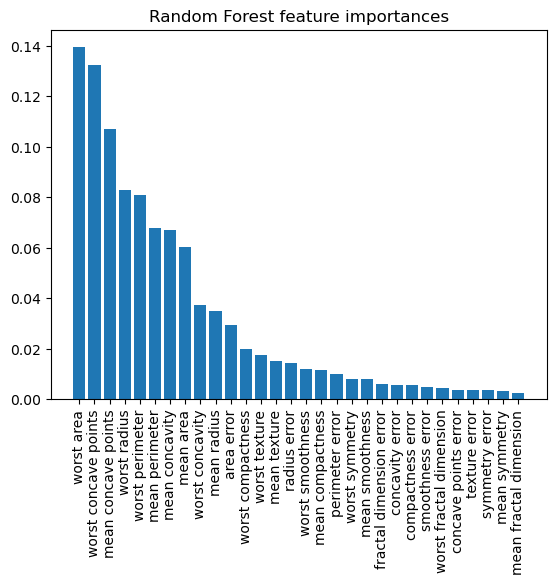

In [17]:
# Create a sorted list of feature importances
import matplotlib.pyplot as plt
sorted_idx = rf_feature_importances.argsort()[::-1]
sorted_rf_feature_importances = rf_feature_importances[sorted_idx]

# Create a bar chart of feature importances
plt.bar(range(X_scaled.shape[1]), sorted_rf_feature_importances)
plt.xticks(range(X_scaled.shape[1]), data.feature_names[sorted_idx], rotation=90)
plt.title("Random Forest feature importances")
plt.show()